In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## 1.1 Implementation

In [2]:
from sklearn.metrics import pairwise_distances_argmin_min
import copy

def kMean(X, n_clusters, n_init=10, max_iter=50):
    best_res = (None, None, None, None) # centers, labels, losses, progress
    # we will run n_init times and find the best result
    for _ in range(n_init):
        losses = []
        progress = []

        # Randomly choose clusters
        i = np.random.choice(X.shape[0], size=n_clusters, replace = False)
        centers = X[i]
        for i in range(max_iter):
            # Assign labels based on closest center
            labels, loss = pairwise_distances_argmin_min(X, centers)

            # Find new centers from means of points
            new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

            # Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers

            losses.append(sum(loss)/len(X))
            if i%3 == 0:
                progress.append((copy.deepcopy(centers), copy.deepcopy(labels)))

        if best_res[2] is None or best_res[2][-1] > losses[-1]:
            best_res = centers, labels, losses, progress

    return best_res

## 1.2 Data Generator

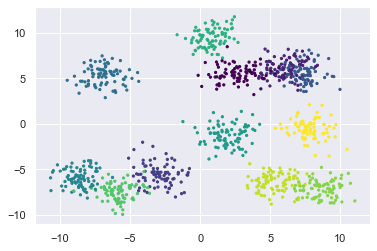

In [3]:
# generate test data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=12, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=5, cmap='viridis');

## 1.3 Perfect Choice of `n_clusters`

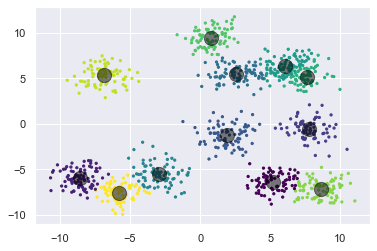

In [4]:
# Training
centers, labels, losses, progress = kMean(X, 12)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

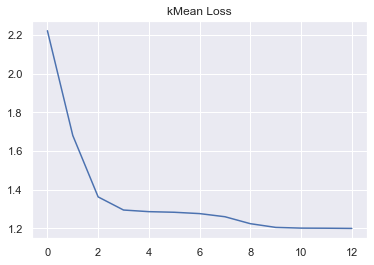

In [5]:
# Loss
plt.title("kMean Loss")
plt.plot(losses)
plt.show()

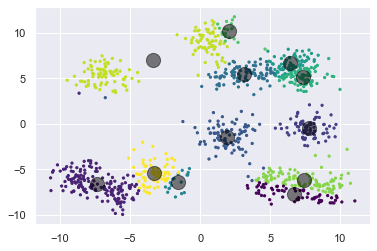

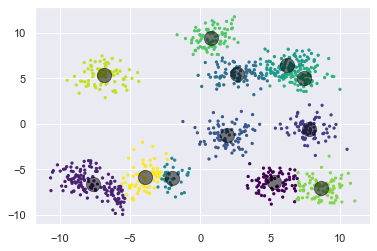

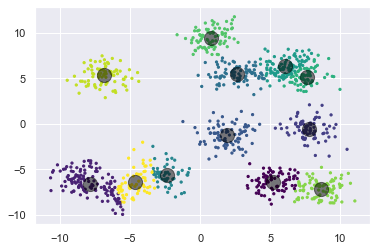

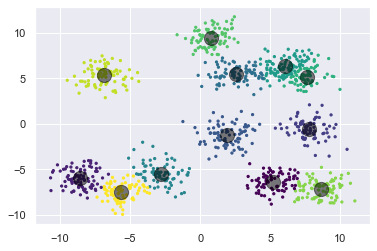

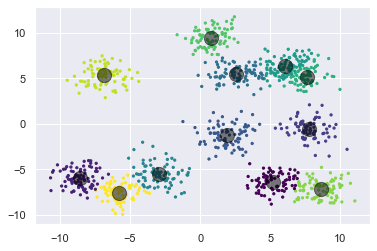

In [6]:
# Progress
for centers, labels in progress:
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

## 1.4 `n_cluster` < true clusters

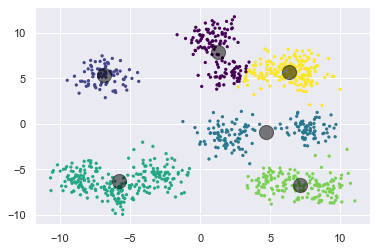

In [7]:
centers, labels, losses, progress = kMean(X, 6)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

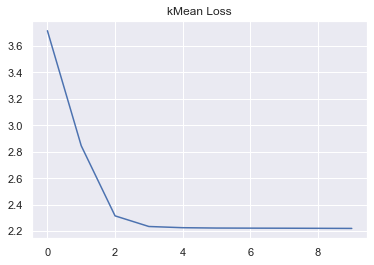

In [8]:
# Loss
plt.title("kMean Loss")
plt.plot(losses)
plt.show()

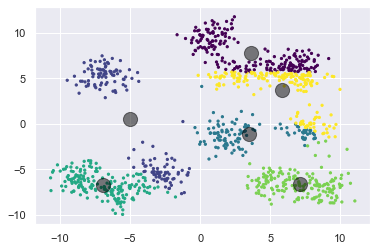

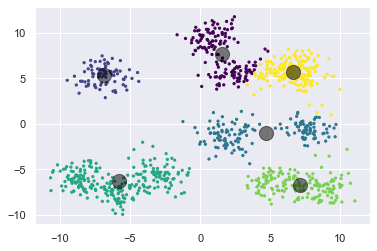

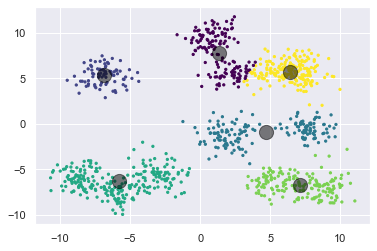

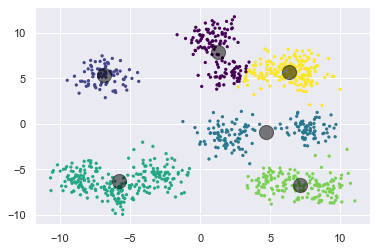

In [9]:
# Progress
for centers, labels in progress:
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

## 1.5 `n_cluster`  > true clusters

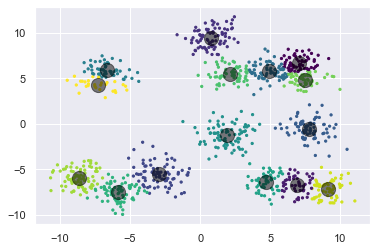

In [10]:
# For n_cluster > true clusters
centers, labels, losses, progress = kMean(X, 15)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

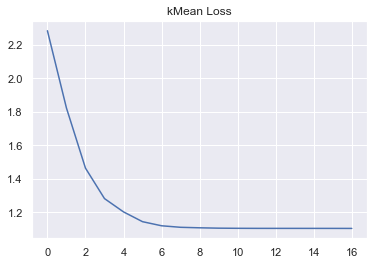

In [11]:
# Loss
plt.title("kMean Loss")
plt.plot(losses)
plt.show()

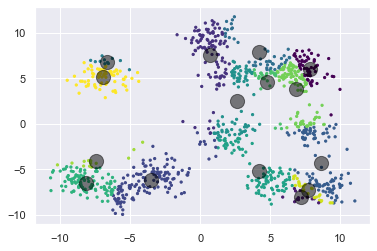

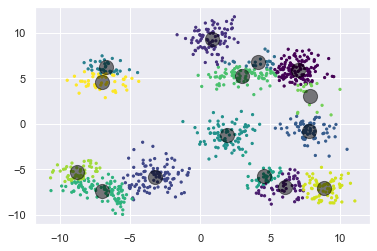

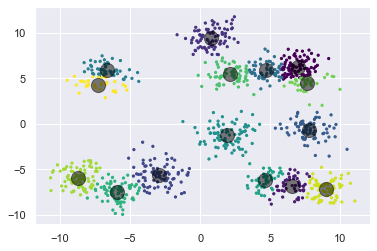

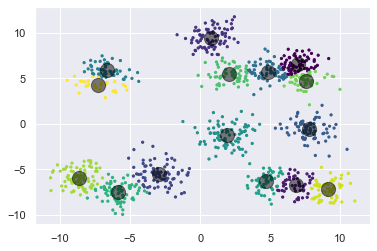

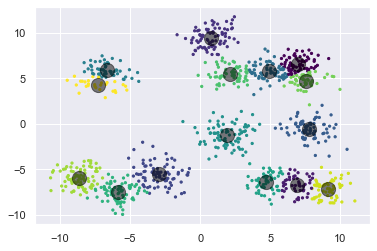

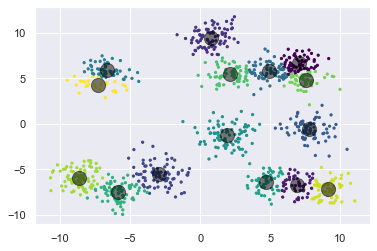

In [12]:
# Progress
for centers, labels in progress:
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()